In [1]:
import numpy as np
from scipy import signal
import math
from wonambi import Dataset
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
import pandas as pd
from glob import glob
import scipy
import sys
sys.path.append('..')
from neursa.preprocessing.preparation import parse_table_info, get_time_for_labels,\
get_labels, get_time_sensors
from neursa.data.dataset import SegmentsDataset


%load_ext autoreload
%autoreload 2


In [2]:
recording_paths = sorted(glob('/data/anvlfilippova/Institution/*/'))
info_path = '/data/anvlfilippova/Institution/SleepSensor_Recordings list.xlsx'

In [3]:
recording_paths_train = ['/data/anvlfilippova/Institution/Recording 0721001/',
 '/data/anvlfilippova/Institution/Recording 0721002/',
 '/data/anvlfilippova/Institution/Recording 0721003/',
#  '/data/anvlfilippova/Institution/Recording 0821004/',
 '/data/anvlfilippova/Institution/Recording 0821005/',
 '/data/anvlfilippova/Institution/Recording 0821006/',
 '/data/anvlfilippova/Institution/Recording 0921007/'
                        ]
recording_paths_valid = ['/data/anvlfilippova/Institution/Recording 0821004/']

In [4]:
train_dataset = SegmentsDataset(recording_paths_train, 
                                segment_params={'window_size': 256*30, 'step_size':256*30})
valid_dataset = SegmentsDataset(recording_paths_valid, 
                               segment_params={'window_size': 256*30, 'step_size':256*30})
train_dataset.process_experiments()
valid_dataset.process_experiments()

Processing experiments: 100%|██████████| 1/1 [00:45<00:00, 45.16s/it]


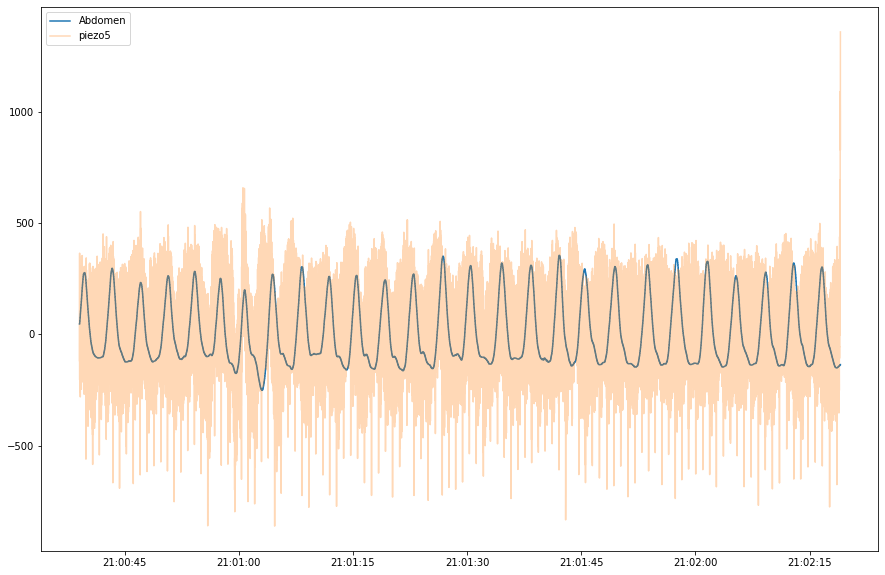

In [37]:
plt.figure(figsize=(15,10))
exp = train_dataset.experiments[0]
start = 10000
stop = start+256*100
plt.plot(exp.time[start:stop], exp.Abdomen[start:stop], label= 'Abdomen')
plt.plot(exp.time[start:stop], -exp.piezo5[start:stop], alpha=0.3, label = 'piezo5')
plt.legend()

In [27]:
exp.Abdomen.shape

(7833600,)

In [28]:
exp.piezo3.shape

(7833600,)